In [1]:
# -*- coding: utf-8 -*-

# Sample Python code for youtube.channels.list
# See instructions for running these code samples locally:
# https://developers.google.com/explorer-help/code-samples#python

import os

import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
import seaborn as sns

import numpy as np
import pandas as pd
import isodate

/usr/local/lib/python3.7/site-packages/google/auth/__init__.py:55: Python37DeprecationWarning: After January 1, 2024, new releases of this library will drop support for Python 3.7. More details about Python 3.7 support can be found at https://cloud.google.com/python/docs/python37-sunset/
  warnings.warn(message, Python37DeprecationWarning)
/usr/local/lib/python3.7/site-packages/google/oauth2/__init__.py:40: Python37DeprecationWarning: After January 1, 2024, new releases of this library will drop support for Python 3.7. More details about Python 3.7 support can be found at https://cloud.google.com/python/docs/python37-sunset/
  warnings.warn(message, Python37DeprecationWarning)


In [2]:
scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

In [3]:
api_key = os.environ["youtube_API_KEY"]

#channel_user_name = 'AlexTheAnalyst'

In [4]:
api_service_name = "youtube"
api_version = "v3"

youtube = googleapiclient.discovery.build(
        api_service_name, api_version, developerKey= api_key)

In [5]:
## function to get channel statistics 

def get_channel_stats (youtube, channel_user_name):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        forUsername=channel_user_name
    )
    response = request.execute()
    
    data = dict( channel_name = response['items'][0]['snippet']['title'],
                subscribers = response['items'][0]['statistics']['subscriberCount'],
                views = response['items'][0]['statistics']['viewCount'],
                total_videos = response['items'][0]['statistics']['videoCount']
               )
    return data

In [6]:
channel_stats = get_channel_stats(youtube, 'michellechoii')

In [7]:
channel_stats

{'channel_name': 'Michelle Choi',
 'subscribers': '2100000',
 'views': '185625584',
 'total_videos': '241'}

In [8]:
channel_data = pd.DataFrame(channel_stats, index = [0])

In [9]:
channel_data

,channel_name,subscribers,views,total_videos
0,Michelle Choi,2100000,185625584,241


In [10]:
Alex_the_analyst_channel_id = 'UC7cs8q-gJRlGwj4A8OmCmXg'
tech_tfq_channel_id = 'UCnz-ZXXER4jOvuED5trXfEA'
lawlumberacct = 'UCtbp5yMSXR3BKR3x8oCRZdQ'

In [11]:
## function to get channel statistics 

def get_playlist_stats (youtube, channel_id):
    request = youtube.playlists().list(
        part = "contentDetails, status, player, snippet",
    channelId = channel_id,
    maxResults = 50)
    
    all_data = []
    
    playlist_json = request.execute()
    
    playlist_count = playlist_json['pageInfo']['totalResults']
    
    for i in range(playlist_count): 
        playlist_data = dict(
            channel_name = playlist_json['items'][i]['snippet']['channelTitle'],
            playlist_id = playlist_json['items'][i]['id'],
            playlist_publiushed_at = playlist_json['items'][i]['snippet']['publishedAt'],
            playlist_title = playlist_json['items'][i]['snippet']['title'],
            description = playlist_json['items'][i]['snippet']['description'],
            video_count = playlist_json['items'][i]['contentDetails']['itemCount'],
            privacy_status =playlist_json['items'][i]['status']['privacyStatus']
            )
        all_data.append(playlist_data)
        
        df = pd.DataFrame(all_data)

    return df

In [12]:
RA_playlist = get_playlist_stats(youtube, 'UC3p6NndPDqX8bwQFT3p8_Qw')

In [13]:
RA_playlist.head()

,channel_name,playlist_id,playlist_publiushed_at,playlist_title,description,video_count,privacy_status
0,Recovery Addict,PL-SflFiIo_nUIs9XvpamPgjn1_-HKXTvE,2023-09-26T23:48:32Z,Take Care of Maya,Civil suit against Johns Hopkins Hospital,61,public
1,Recovery Addict,PL-SflFiIo_nV_d2mx4X4CbkE6H-L39zws,2023-09-01T17:57:27Z,Child in Hot Car,Mom and boyfriend left child in hot car to die...,0,public
2,Recovery Addict,PL-SflFiIo_nXZHZOCi3og6cdalUtj9HK9,2023-08-08T12:41:36Z,Thomas Randolph,TR is accused of killing his sixth wife for th...,37,public
3,Recovery Addict,PL-SflFiIo_nXW_Mvg1WlA0OqpY8wnaJGe,2023-08-04T12:18:55Z,Kouri Richins,"Kill your spouse, then write a for for your ki...",2,public
4,Recovery Addict,PL-SflFiIo_nULPQ_5hRO1ZgFgfTfz-B0Y,2023-08-01T12:17:27Z,Sov Cit,Why to always hire a lawyer to defend you!,8,public


In [14]:
RA_playlist_ids = np.array(RA_playlist['playlist_id'])

In [15]:
RA_playlist_ids

array(['PL-SflFiIo_nUIs9XvpamPgjn1_-HKXTvE',
       'PL-SflFiIo_nV_d2mx4X4CbkE6H-L39zws',
       'PL-SflFiIo_nXZHZOCi3og6cdalUtj9HK9',
       'PL-SflFiIo_nXW_Mvg1WlA0OqpY8wnaJGe',
       'PL-SflFiIo_nULPQ_5hRO1ZgFgfTfz-B0Y',
       'PL-SflFiIo_nW5RTAOwSAihNPVsQyuYAj7',
       'PL-SflFiIo_nUqRLqmwRodXCnrnVefxE1c',
       'PL-SflFiIo_nX75DvJbYDcGWflU4jCQVoP',
       'PL-SflFiIo_nUu3FHpNAoKXTlPCey0i-7z',
       'PL-SflFiIo_nV-6pDtFWj90xx8P6i3GMSl',
       'PL-SflFiIo_nUxdjYpzpO-Z4GMjNJDyswS',
       'PL-SflFiIo_nVykNB_1hcqydWSeRCN1qAB',
       'PL-SflFiIo_nX3UqXCtNMP0UX-n2N13DwQ',
       'PL-SflFiIo_nX_2wxBgNYV9kTNCbMJYPng',
       'PL-SflFiIo_nW21aAoLsTKs_l0nuLIf2W2',
       'PL-SflFiIo_nWY4G-t828vHCqq4xG3sasY',
       'PL-SflFiIo_nW6vYpGHgG_GSNbkOqLiUTL',
       'PL-SflFiIo_nV0KruxLO1Qc54uMYXwYaYu',
       'PL-SflFiIo_nVO1HZe1HwI01kOXA5SECrm',
       'PL-SflFiIo_nVH2a9yUbBrJfFq7WfkomrR',
       'PL-SflFiIo_nWAfq8nxZs246nhvUSX9_GZ',
       'PL-SflFiIo_nWNROpmOjXdYVUhRJr37Jwl',
       'PL

In [16]:
#get_playlist_stats(youtube, lawlumberacct)

In [17]:
#get_playlist_stats(youtube, tech_tfq_channel_id)

In [18]:
get_playlist_stats(youtube, 'UC7cs8q-gJRlGwj4A8OmCmXg')

,channel_name,playlist_id,playlist_publiushed_at,playlist_title,description,video_count,privacy_status
0,Alex The Analyst,PLUaB-1hjhk8G-xVXA5FxT2cLNzd87GInr,2023-07-11T13:56:02Z,Python Web Scraping Basics,,4,public
1,Alex The Analyst,PLUaB-1hjhk8EwZgCwBP36HH-SLJk4RaWp,2023-04-20T14:40:58Z,Python Regular Expression,,4,public
2,Alex The Analyst,PLUaB-1hjhk8GZOuylZqLz-Qt9RIdZZMBE,2023-03-07T11:13:09Z,Pandas for Beginners,,8,public
3,Alex The Analyst,PLUaB-1hjhk8FE_XZ87vPPSfHqb6OcM0cF,2023-01-18T12:58:52Z,Data Analyst Bootcamp,YouTube's first FREE Data Analyst Bootcamp!!\n...,70,public
4,Alex The Analyst,PLUaB-1hjhk8GnKlCG7I-I1tGxiB46SPWA,2022-12-31T02:32:07Z,Python Projects for Beginners,,2,public
5,Alex The Analyst,PLUaB-1hjhk8GHKfndKjyDMHPg_HlQ4vpK,2022-11-07T20:09:34Z,Python for Beginners,,10,public
6,Alex The Analyst,PLUaB-1hjhk8HqnmK0gQhfmIdCbxwoAoys,2022-05-18T03:04:03Z,Power BI Tutorials for Beginners,Power BI Tutorial videos for beginners!,9,public
7,Alex The Analyst,PLUaB-1hjhk8Hyd5NiPQ9CND82vNodlFF5,2021-12-13T00:37:21Z,Excel Tutorials for Data Analysts,,7,public
8,Alex The Analyst,PLUaB-1hjhk8GwbqoVmo_5zuhOa0Tcl3xC,2021-09-20T02:17:23Z,Tableau Tutorials For Beginners,,5,public
9,Alex The Analyst,PLUaB-1hjhk8FTfqkVoJqcU3p3E9klHqMq,2021-07-15T20:16:07Z,Data Analyst Courses,,11,public


In [20]:
def parse_video_json(playlistitems_json,num_vids): 
    vid_data = []
    for i in range(num_vids):
        playlist_items_data = dict(
        channel_name = playlistitems_json['items'][i]['snippet']['channelTitle'],
        vid_id = playlistitems_json['items'][i]['contentDetails']['videoId'],
        vid_position = playlistitems_json['items'][i]['snippet']['position'],
        vid_published_at = playlistitems_json['items'][i]['snippet']['publishedAt'],
        vid_title = playlistitems_json['items'][i]['snippet']['title'],
        vid_description = playlistitems_json['items'][i]['snippet']['description'],
        channel_id = playlistitems_json['items'][i]['snippet']['videoOwnerChannelId'],
        privacy_status =playlistitems_json['items'][i]['status']['privacyStatus']
        )
        vid_data.append(playlist_items_data)
    return vid_data

In [36]:
## function to get channel statistics 

def get_playlistitems_stats (youtube, playlist_id):
    res = youtube.playlistItems().list(
        part = "contentDetails, status, id, snippet",
        playlistId = playlist_id,
    maxResults = 50).execute()
    
    number_of_vids = len(res['items'])

    full_data = parse_video_json(res,number_of_vids) 
    
    nextPageToken = res.get('nextPageToken')
    
    while ('nextPageToken' in res):
        nextPage = youtube.playlistItems().list(
        part = "contentDetails, status, id, snippet",
        playlistId = playlist_id,
        maxResults = 50,
        pageToken = nextPageToken
        ).execute()
        
        full_data = full_data + parse_video_json(nextPage,len(nextPage['items']))

        if 'nextPageToken' not in nextPage:
            res.pop('nextPageToken', None)
        else:
            nextPageToken = nextPage.get('nextPageToken')
          
    df1 = pd.DataFrame(full_data)
    
    return df1

In [90]:
analyticsBootCampVideos = np.array(get_playlistitems_stats(youtube, 'PLUaB-1hjhk8FE_XZ87vPPSfHqb6OcM0cF')['vid_id'])

In [30]:
#get_playlistitems_stats(youtube, 'PLUaB-1hjhk8FE_XZ87vPPSfHqb6OcM0cF')

In [31]:
#get_playlistitems_stats (youtube, 'PLUaB-1hjhk8FE_XZ87vPPSfHqb6OcM0cF')

In [32]:
#get_playlistitems_stats (youtube, 'PLjAQjmBL37WtLOD7js9ECkmEbDZ6LCUjD')

In [ ]:
    for i in range(len(video_ids)):
        vidDetails= dict(
            videoId = videos_json['items'][i]['id'],
            channelId = videos_json['items'][i]['snippet']['channelId'],
            publishedAt = videos_json['items'][i]['snippet']['publishedAt'],
            viewCcount = videos_json['items'][i]['statistics']['viewCount'],
            likeCount = videos_json['items'][i]['statistics']['likeCount'],
            favoriteCount = videos_json['items'][i]['statistics']['favoriteCount'],
            commentCount = videos_json['items'][i]['statistics']['commentCount'],
            liveBroadcastContent = videos_json['items'][i]['snippet']['liveBroadcastContent'],
            duration = videos_json['items'][i]['contentDetails']['duration'],
            #liveStreamingDetails = videos_json['items'][0]['liveStreamingDetails']['liveStreamingDetails']['actualStartTime']
        )
        full_data.append(vidDetails)

In [85]:
def get_video_stats (youtube, video_ids =[]):
    videos_json = []
    full_data = []
    
    for vid_id in video_ids:
        results = youtube.videos().list(
            part = "contentDetails, id, liveStreamingDetails, localizations, player, snippet, statistics, status, topicDetails",
            id = vid_id,
        maxResults = 50).execute()

        videos_json.append(results)
    
    for i in range(len(videos_json)):
        vidDetails= dict(
            videoId = videos_json[i]['items'][0]['id'],
            channelId = videos_json[i]['items'][0]['snippet']['channelId'],
            publishedAt = videos_json[i]['items'][0]['snippet']['publishedAt'],
            viewCcount = videos_json[i]['items'][0]['statistics']['viewCount'],
            likeCount = videos_json[i]['items'][0]['statistics']['likeCount'],
            favoriteCount = videos_json[i]['items'][0]['statistics']['favoriteCount'],
            commentCount = videos_json[i]['items'][0]['statistics']['commentCount'],
            liveBroadcastContent = videos_json[i]['items'][0]['snippet']['liveBroadcastContent'],
            duration = videos_json[i]['items'][0]['contentDetails']['duration'],
            #liveStreamingDetails = videos_json['items'][0]['liveStreamingDetails']['liveStreamingDetails']['actualStartTime']
        )
        full_data.append(vidDetails)

    return pd.DataFrame(full_data)



In [ ]:
add video name
add description (Can separate the SQl, python etc etc from each other)
#most viewed
#least viewed 
#group by content type


In [86]:
#get_video_stats(youtube ,['sQX1jdrTIhE'])
#get_video_stats(youtube ,['NUkOHjo4THo']) #live
get_video_stats(youtube , analyticsBootCampVideos) #notlive


,videoId,channelId,publishedAt,viewCcount,likeCount,favoriteCount,commentCount,liveBroadcastContent,duration
0,rGx1QNdYzvs,UC7cs8q-gJRlGwj4A8OmCmXg,2023-02-07T12:30:11Z,660381,24308,0,1184,none,PT6M52S
1,CUBfrdDwznQ,UC7cs8q-gJRlGwj4A8OmCmXg,2023-01-31T12:30:06Z,805344,29902,0,907,none,PT13M59S
2,RSlqWnP-Dy8,UC7cs8q-gJRlGwj4A8OmCmXg,2020-03-01T00:50:38Z,1062565,14830,0,1717,none,PT9M37S
3,PyYgERKq25I,UC7cs8q-gJRlGwj4A8OmCmXg,2020-03-01T17:02:28Z,367975,5810,0,238,none,PT6M14S
4,A9TOuDZTPDU,UC7cs8q-gJRlGwj4A8OmCmXg,2020-03-02T16:01:01Z,252579,4797,0,136,none,PT7M58S
...,...,...,...,...,...,...,...,...,...
65,KB2CtEDrglY,UC7cs8q-gJRlGwj4A8OmCmXg,2022-06-07T10:30:10Z,42590,796,0,72,none,PT51M14S
66,ocdwh0KYeUs,UC7cs8q-gJRlGwj4A8OmCmXg,2021-06-29T11:30:13Z,388647,9816,0,614,none,PT35M29S
67,WizLaDdsHUs,UC7cs8q-gJRlGwj4A8OmCmXg,2023-03-14T11:30:10Z,103697,3401,0,187,none,PT17M37S
68,7uH7_DThtX0,UC7cs8q-gJRlGwj4A8OmCmXg,2020-11-17T14:11:52Z,228532,9001,0,207,none,PT6M50S


In [87]:
playlists = get_playlist_stats(youtube, Alex_the_analyst_channel_id)

In [88]:
playlists.head()

,channel_name,playlist_id,playlist_publiushed_at,playlist_title,description,video_count,privacy_status
0,Alex The Analyst,PLUaB-1hjhk8G-xVXA5FxT2cLNzd87GInr,2023-07-11T13:56:02Z,Python Web Scraping Basics,,4,public
1,Alex The Analyst,PLUaB-1hjhk8EwZgCwBP36HH-SLJk4RaWp,2023-04-20T14:40:58Z,Python Regular Expression,,4,public
2,Alex The Analyst,PLUaB-1hjhk8GZOuylZqLz-Qt9RIdZZMBE,2023-03-07T11:13:09Z,Pandas for Beginners,,8,public
3,Alex The Analyst,PLUaB-1hjhk8FE_XZ87vPPSfHqb6OcM0cF,2023-01-18T12:58:52Z,Data Analyst Bootcamp,YouTube's first FREE Data Analyst Bootcamp!!\n...,70,public
4,Alex The Analyst,PLUaB-1hjhk8GnKlCG7I-I1tGxiB46SPWA,2022-12-31T02:32:07Z,Python Projects for Beginners,,2,public


In [94]:
bootcamp_video_stats = get_video_stats(youtube, analyticsBootCampVideos)

In [95]:
bootcamp_video_stats.dtypes

videoId                 object
channelId               object
publishedAt             object
viewCcount              object
likeCount               object
favoriteCount           object
commentCount            object
liveBroadcastContent    object
duration                object
dtype: object

In [96]:
bootcamp_video_stats['viewCount'] = pd.to_numeric(bootcamp_video_stats['viewCcount'])
bootcamp_video_stats['likeCount'] = pd.to_numeric(bootcamp_video_stats['likeCount'])
bootcamp_video_stats['commentCount'] = pd.to_numeric(bootcamp_video_stats['commentCount'])
bootcamp_video_stats['publishedAt'] = pd.to_datetime(bootcamp_video_stats['publishedAt'])
bootcamp_video_stats['duration'] = [isodate.parse_duration(i).total_seconds() for i in bootcamp_video_stats['duration']]

In [97]:
bootcamp_video_stats.head()

,videoId,channelId,publishedAt,viewCcount,likeCount,favoriteCount,commentCount,liveBroadcastContent,duration,viewCount
0,rGx1QNdYzvs,UC7cs8q-gJRlGwj4A8OmCmXg,2023-02-07 12:30:11+00:00,660393,24308,0,1184,none,412.0,660393
1,CUBfrdDwznQ,UC7cs8q-gJRlGwj4A8OmCmXg,2023-01-31 12:30:06+00:00,805344,29902,0,907,none,839.0,805344
2,RSlqWnP-Dy8,UC7cs8q-gJRlGwj4A8OmCmXg,2020-03-01 00:50:38+00:00,1062570,14830,0,1717,none,577.0,1062570
3,PyYgERKq25I,UC7cs8q-gJRlGwj4A8OmCmXg,2020-03-01 17:02:28+00:00,367955,5810,0,238,none,374.0,367955
4,A9TOuDZTPDU,UC7cs8q-gJRlGwj4A8OmCmXg,2020-03-02 16:01:01+00:00,252579,4797,0,136,none,478.0,252579


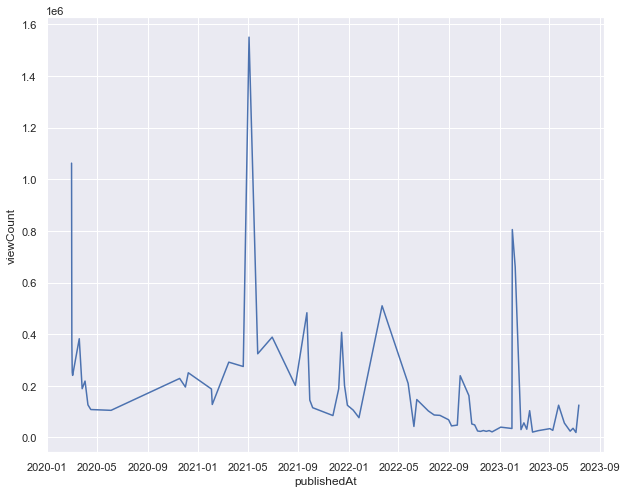

In [98]:
sns.set(rc = {'figure.figsize' :(10,8)})
ax = sns.lineplot(x='publishedAt', y = 'viewCount', data = bootcamp_video_stats)

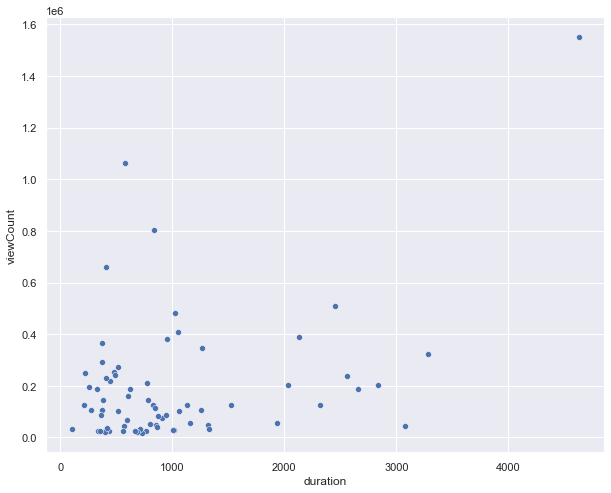

In [99]:
ax = sns.scatterplot(x='duration', y = 'viewCount', data = bootcamp_video_stats)

In [ ]:
another youtube channel tocheck out
https://www.youtube.com/watch?v=ZML_EJrBhnY&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=18

In [109]:
bootcamp_video_stats.to_csv(path_or_buf = '/Users/rebeccan/Desktop/Analytics Projects/bootcampvids.csv')

In [104]:
os.

'.'

In [ ]:
sns.s